### A basketball analysis workflow using Quary transformed tables

1. Connect to the DuckDB database and import dependencies

In [2]:
# Import required libraries
import duckdb
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the DuckDB database
conn = duckdb.connect(database='./duckdb.db')

In [3]:
df = conn.execute("SELECT * FROM stg_players").df()


CatalogException: Catalog Error: Table with name aggregated_sales does not exist!
Did you mean "temp.information_schema.character_sets"?
LINE 1: SELECT * FROM aggregated_sales
                      ^

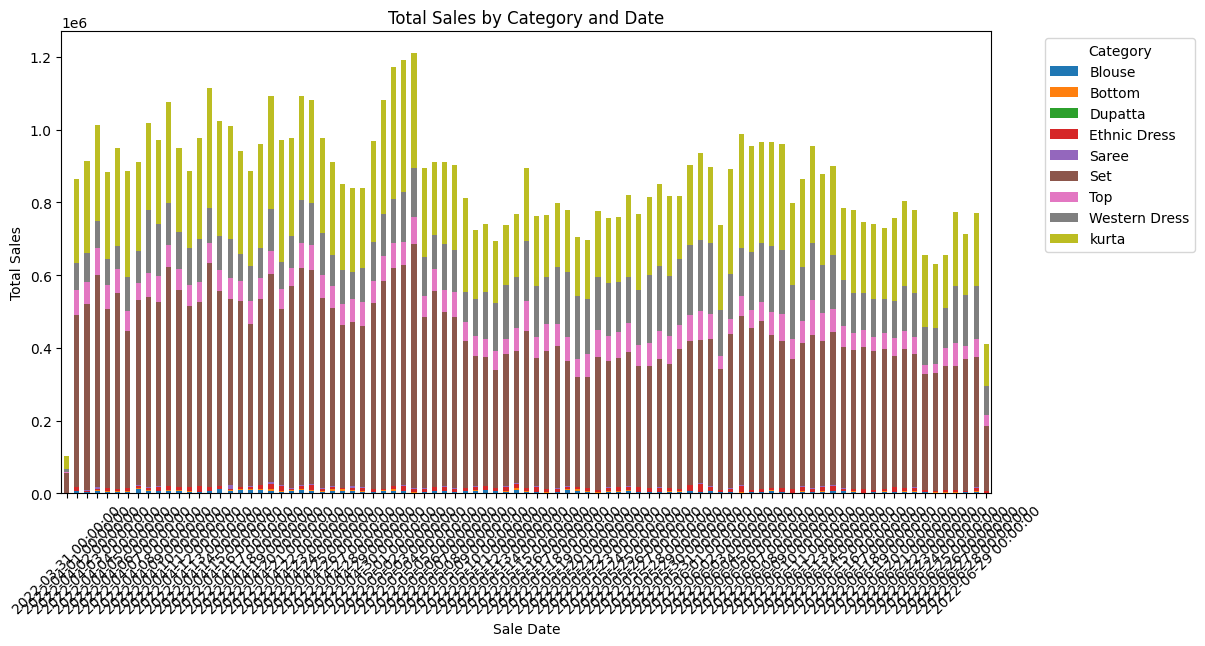

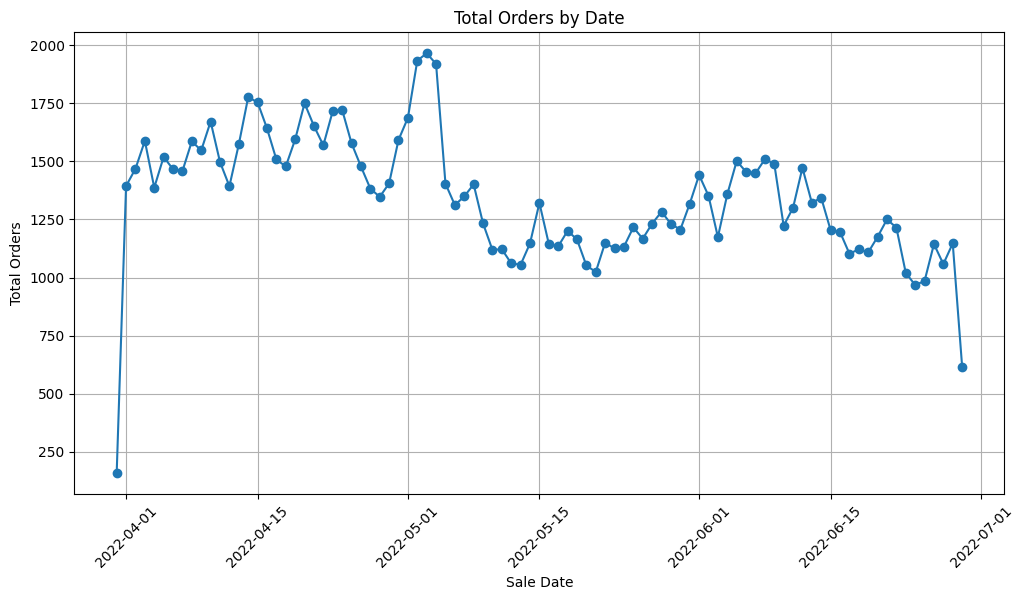

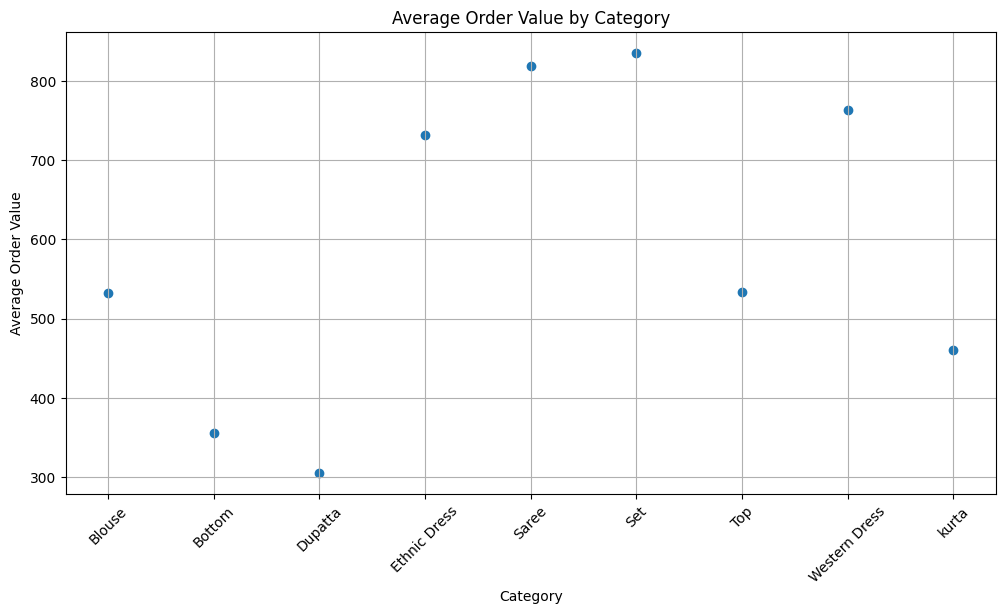

In [44]:

# Execute the SQL query to retrieve data from the "sales" view
query = '''
SELECT 
    date,
    category,
    SUM(amount) AS total_sales,
    COUNT(DISTINCT order_id) AS total_orders,
    AVG(amount) AS avg_order_value
FROM 
    sales
GROUP BY
    date,
    category
ORDER BY
    date,
    category
'''
df = conn.execute(query).df()

# Close the database connection
conn.close()

# Create a pivot table to reshape the data for visualization
pivot_df = df.pivot(index='date', columns='category', values='total_sales')

# Create a stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Sale Date')
plt.ylabel('Total Sales')
plt.title('Total Sales by Category and Date')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

# Create a line chart for total orders
df_orders = df.groupby('date')['total_orders'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(df_orders['date'], df_orders['total_orders'], marker='o')
plt.xlabel('Sale Date')
plt.ylabel('Total Orders')
plt.title('Total Orders by Date')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Create a scatter plot for average order value
df_aov = df.groupby('category')['avg_order_value'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.scatter(df_aov['category'], df_aov['avg_order_value'])
plt.xlabel('Category')
plt.ylabel('Average Order Value')
plt.title('Average Order Value by Category')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()